In [2]:
import numpy as np
from numpy import linalg as ln
import pylab as pl
import pandas as pd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
def distance(a, A):
    sup = ln.norm(a - A[0])
    for i in A:
        var = ln.norm(a - i)
        if (sup < var):
            sup = var
    return sup

In [4]:
def F(z, S_a, S_b):
    r_a = distance(z, S_a)
    r_b = distance(z, S_b)
    return (r_b - r_a)/(r_b + r_a) 

In [5]:
def Fris_F(stolps_index_a, stolps_index_b, A, B):
    S_a = [A[i] for i in stolps_index_a]
    S_b = [B[i] for i in stolps_index_b]
    return (sum([F(A[i], S_a, S_b) for i in range(len(A)) if (not i in stolps_index_a)]) + 
            sum([F(B[i], S_b, S_a) for i in range(len(B)) if (not i in stolps_index_b)]))/(len(A) + len(B))

In [6]:
def choose_new_stolps(stolps, A, B):
    sup = -1
    new_stolps = [[], []]
    for i in range(len(A)):
        for j in range(len(B)):
            if ((not i in stolps[0]) and ( not j in stolps[1])):
                var = Fris_F(stolps[0] + [i], stolps[1]+[j], A, B)
                if (var > sup):
                    sup = var
                    new_stolps = [i, j]
    sys.stdout.write('\r Fris_func = {}'.format(sup))
    stolps[0].append(new_stolps[0])
    stolps[1].append(new_stolps[1])
    return stolps
        
        

In [6]:
number = 5
a = np.random.normal(0, 1, (number*4, 2))
b = np.random.normal(4, 1, (number, 2))
c = np.random.normal([0,4], 1, (number,2))
c = np.vstack((b, c))
b = np.random.normal([4,0], 1, (number,2))
c = np.vstack((b,c))
b = np.random.normal([-4,0], 1, (number,2))
c = np.vstack((b,c))
b = np.random.normal([0,-4], 1, (number,2))
c = np.vstack((b,c))
b = np.random.normal([-4,-4], 1, (number,2))
c = np.vstack((b,c))
b = np.random.normal([4,-4], 1, (number,2))
c = np.vstack((b,c))
b = np.random.normal([-4,4], 1, (number,2))
c = np.vstack((b,c))

In [8]:
stolps = choose_new_stolps([[],[]], a, c)

 Fris_func = 0.14924335508948117

In [9]:
stolps = choose_new_stolps(stolps, a, c)

 Fris_func = 0.11156132742437999

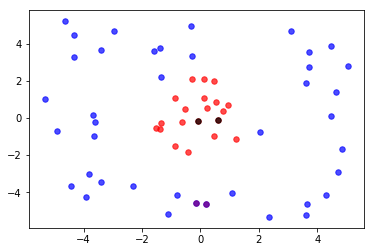

In [10]:
pl.scatter(a[:,0], a[:,1], c= 'red', s=30, alpha = 0.7)
pl.scatter(c[:,0], c[:,1], c='blue', s=30, alpha =0.7)
pl.scatter(a[stolps[0][:], 0], a[stolps[0][:], 1], c='black', s = 30, alpha = 0.7)
pl.scatter(c[stolps[1][:], 0], c[stolps[1][:],1], c='purple', s = 30, alpha = 0.7)
pl.show()

In [100]:
stolps

[[20, 35, 31, 6, 11], [73, 74, 70, 77, 72]]

In [7]:
data = pd.read_csv('train.csv', sep = ',', encoding = 'utf-8')

In [8]:
new_data = pd.DataFrame({'x':[], 'y':[], 'scale':[]})

In [ ]:
counts = data['label'].value_counts()
for h in range(10):
    for i in range(28):
        for j in range(28):
            sys.stdout.write("\r Percent = {}".format((h*28*28+i*28+j)/(10*28*28)))
            new_data = new_data.append(pd.DataFrame({'x':[i for k in range(counts[h])], 'y':[j for k in range(counts[h])], 
                                                     'scale':data['pixel{}'.format(i+j*28)][data['label'] == h]}), ignore_index=True)

 Percent = 0.26109693877551023555